In [1]:
# Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sb
df1 = pd.read_excel('naval_data.xlsx')

In [2]:
#Droping all data before 1906 as none of it contians ship numbers

year_list = [1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905]
df1.set_index(["year"], inplace=True)

df1.drop(index=year_list, inplace=True)
df1.dropna(inplace=True)

df1.reset_index()
df1.head(1)

,cowcode,country,totton,tonn_prop,Battleship,DieselSub,NukeAttSub,BalSub,AircraftCarrier,region,region_prop,irst,milex,milper,pec,tpop,upop,cinc
year,,,,,,,,,,,,,,,,,,
1906,2.0,USA,758326.0,0.141606,1.0,9.0,0.0,0.0,0.0,5.0,0.164312,23774.0,43602.0,112.0,419190.0,85450.0,17600.0,0.218284


In [3]:
# Droping Extra Columns
df1.drop(columns=["cowcode", "region", "region_prop", "irst", "milex", "milper", "pec", "tpop", "upop"], axis=1, inplace=True)
df1.head(1)

,country,totton,tonn_prop,Battleship,DieselSub,NukeAttSub,BalSub,AircraftCarrier,cinc
year,,,,,,,,,
1906,USA,758326.0,0.141606,1.0,9.0,0.0,0.0,0.0,0.218284


In [4]:
# Renameing Columns
col_rename = {'totton':'total_tonnage', 'tonn_prop':'%_of_regional_tonnage', 'Battleship':'bb', 'DieselSub': "ssk", 'NukeAttSub': 'ssn', 'BalSub': 'ssbn', 'AircraftCarrier': 'cv', 'cinc':'national_capability'}
df1.rename(columns=col_rename, inplace=True)
df1.head(1)

,country,total_tonnage,%_of_regional_tonnage,bb,ssk,ssn,ssbn,cv,national_capability
year,,,,,,,,,
1906,USA,758326.0,0.141606,1.0,9.0,0.0,0.0,0.0,0.218284


In [5]:
# Changing country names of countrys that renamed/had changed. This was done in Excell as I dont know how to do it in pandas.
# All Great Britain entrys were swithced to UK, and all Germany entrys were swithced to Germany and redored in chrological time. 
# Gained Spaces: New Zealand, South Africa, South Africa, Saudi Arabia, Dominican Republic.
# Gained hyphen: Astria-Hungary


In [6]:
# Check dataframe shape
df_save=df1
df1.shape

(3810, 9)

In [7]:
# See first 30 rows
df1.head(30)

,country,total_tonnage,%_of_regional_tonnage,bb,ssk,ssn,ssbn,cv,national_capability
year,,,,,,,,,
1906,USA,758326.0,0.141606,1.0,9.0,0.0,0.0,0.0,0.218284
1907,USA,769922.0,0.140032,1.0,11.0,0.0,0.0,0.0,0.227735
1908,USA,786164.0,0.137501,2.0,11.0,0.0,0.0,0.0,0.203193
1909,USA,851971.0,0.141084,5.0,17.0,0.0,0.0,0.0,0.225197
1910,USA,872891.0,0.139638,6.0,18.0,0.0,0.0,0.0,0.226487
1911,USA,920682.0,0.133043,8.0,22.0,0.0,0.0,0.0,0.216210
1912,USA,982632.0,0.135817,10.0,27.0,0.0,0.0,1.0,0.224931
1913,USA,986812.0,0.123456,10.0,33.0,0.0,0.0,1.0,0.219916
1914,USA,1045455.0,0.121869,12.0,39.0,0.0,0.0,1.0,0.206369


In [8]:
# Save cleaned data to excel document (debug purposes)
df1.to_excel('naval_data_cleaned.xlsx')

In [9]:
# Load cleaned excel data (debug purposes)
df1 = pd.read_excel('naval_data_cleaned.xlsx')

In [10]:
# One hot encode the country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
country = ohe.fit_transform(df1[['country']]).toarray()
countryDF = pd.DataFrame(country).astype(int)
countryDF.columns = [name[3:] for name in ohe.get_feature_names()]
df1.drop(columns=['country'], inplace=True)
df1 = pd.concat([df1, countryDF], axis=1)

In [11]:
# View the first 30 rows
df1.head(30)

,year,total_tonnage,%_of_regional_tonnage,bb,ssk,ssn,ssbn,cv,national_capability,Albania,...,Thailand,Turkey,UK,USA,Ukraine,United Arab Emirates,Uruguay,Venezuela,Vietnam,Yugoslavia
0,1906,758326,0.141606,1,9,0,0,0,0.218284,0,...,0,0,0,1,0,0,0,0,0,0
1,1907,769922,0.140032,1,11,0,0,0,0.227735,0,...,0,0,0,1,0,0,0,0,0,0
2,1908,786164,0.137501,2,11,0,0,0,0.203193,0,...,0,0,0,1,0,0,0,0,0,0
3,1909,851971,0.141084,5,17,0,0,0,0.225197,0,...,0,0,0,1,0,0,0,0,0,0
4,1910,872891,0.139638,6,18,0,0,0,0.226487,0,...,0,0,0,1,0,0,0,0,0,0
5,1911,920682,0.133043,8,22,0,0,0,0.216210,0,...,0,0,0,1,0,0,0,0,0,0
6,1912,982632,0.135817,10,27,0,0,1,0.224931,0,...,0,0,0,1,0,0,0,0,0,0
7,1913,986812,0.123456,10,33,0,0,1,0.219916,0,...,0,0,0,1,0,0,0,0,0,0
8,1914,1045455,0.121869,12,39,0,0,1,0.206369,0,...,0,0,0,1,0,0,0,0,0,0
9,1915,1087417,0.119965,14,44,0,0,1,0.222088,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
# Separate the labels from the rest of the values
X = df1.drop(columns=["national_capability"]).values
y = (df1["national_capability"] * 100).round().values
print("X:", X)
print("y:", y)

X: [[1.9060000e+03 7.5832600e+05 1.4160629e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.9070000e+03 7.6992200e+05 1.4003173e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.9080000e+03 7.8616400e+05 1.3750057e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.0050000e+03 7.2000000e+03 1.1285325e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0060000e+03 7.2000000e+03 1.1164766e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0070000e+03 7.2000000e+03 1.1145379e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
y: [22. 23. 20. ...  0.  0.  0.]


In [13]:
# Split the data into a train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (3048, 82) (3048,)
Test set: (762, 82) (762,)


In [14]:
# Apply the decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
# Use the decision tree classifier to predict the test set
y_predict = clf.predict(X_test)
y_predict

array([ 0.,  0.,  1.,  1.,  0.,  0.,  0., 16.,  3.,  1.,  5.,  1.,  7.,
        0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  3.,  0.,  2.,  0.,  0.,  1.,  1.,  1., 29.,  4., 15.,
        9.,  1.,  0.,  3.,  0., 14., 17.,  1., 13.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1., 17.,  1.,
        0.,  0.,  3.,  5., 26.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,
        1.,  0.,  1.,  9.,  1.,  1.,  1.,  2.,  2.,  0., 14.,  0.,  1.,
        0.,  0., 17.,  0.,  2.,  1.,  3.,  0.,  1.,  1.,  0.,  1.,  6.,
        1.,  3.,  0.,  1.,  5.,  4.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  3., 14., 16.,  0., 11., 12.,  0.,  1.,  6.,  1.,  1.,  1.,
        0., 20., 35.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  3.,  0.,  0.,
        1.,  0.,  1.,  1.,  0., 14.,  1.,  0.,  1.,  0.,  0.,  1., 10.,
        2.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
       10.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2

In [16]:
# Observe the train/test set accuracy
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy: 1.0
Test set Accuracy: 0.9002624671916011


In [17]:
# Show the test set confusion matrix
from sklearn.metrics import confusion_matrix
labels = [0,1]
cm = confusion_matrix(y_test,y_predict,labels)
print(cm)

[[279   8]
 [  8 283]]


In [18]:
# Apply the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [19]:
# Predict using the KNN classifier
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 2., 1., 1., 0.])

In [20]:
# Observe the train/test set accuracy
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.7837926509186351
Test set Accuracy: 0.6430446194225722


In [21]:
# Show the test set confusion matrix
from sklearn.metrics import confusion_matrix
labels = [0,1]
cm = confusion_matrix(y_test,yhat,labels)
print(cm)

[[239  45]
 [ 54 219]]


In [22]:
#ANOVA
#How does total tonnage affect national capability?

anova1= df_save.reset_index()
anova1=anova1[['total_tonnage','national_capability', 'country']]
anova1 = anova1.set_index(["country"])

grouped_test2=anova1[['total_tonnage','national_capability']].groupby(['country'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('USA')['national_capability'], grouped_test2.get_group('Russia')['national_capability'], grouped_test2.get_group('China')['national_capability'], grouped_test2.get_group('UK')['national_capability'], grouped_test2.get_group('Japan')['national_capability'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 243.39605649143382 , P = 7.5535545793306965e-115


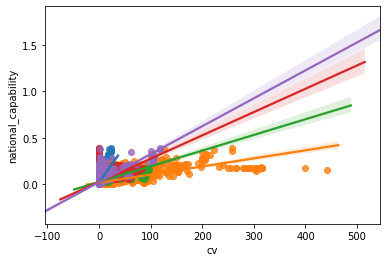

In [23]:
#Plotting Ships vs national capability
#Settup
df_plot1= df_save.reset_index()
df_plot1 = df_plot1[["bb",'ssk', "ssn","ssbn", "cv", "national_capability"]]

sb.regplot(x="bb",y="national_capability", data=df_plot1)
sb.regplot(x="ssk",y="national_capability",data=df_plot1)
sb.regplot(x="ssn",y="national_capability",data=df_plot1)
sb.regplot(x="ssbn",y="national_capability",data=df_plot1)
sb.regplot(x="cv",y="national_capability",data=df_plot1)
plt.savefig('ships vs. nat cap.png')

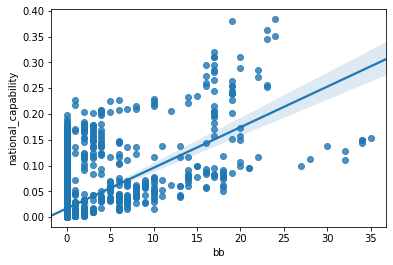

In [24]:
# Battleships vs national capability
sb.regplot(x="bb",y="national_capability", data=df_plot1)

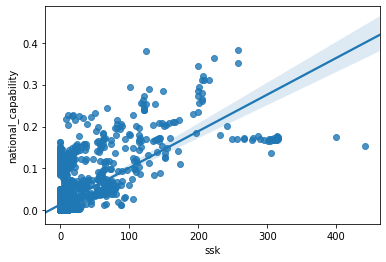

In [25]:
# Desil Subs vs national capability
sb.regplot(x="ssk",y="national_capability",data=df_plot1)

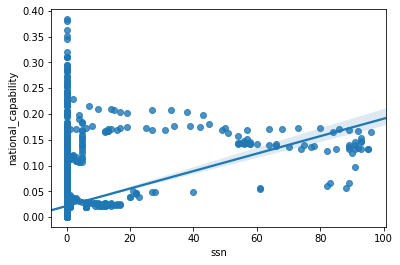

In [26]:
# Nuke Subs vs national capability
sb.regplot(x="ssn",y="national_capability",data=df_plot1)

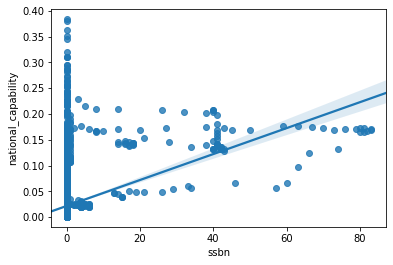

In [27]:
# Nuke Missle Subs vs national capability
sb.regplot(x="ssbn",y="national_capability",data=df_plot1)

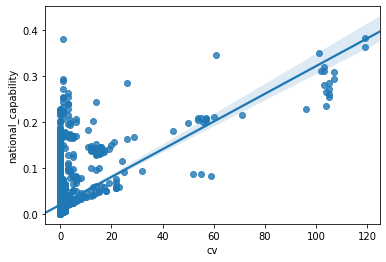

In [28]:
# Carriers vs national capability
sb.regplot(x="cv",y="national_capability",data=df_plot1)

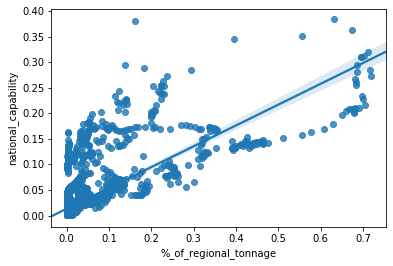

In [29]:
# %Regional Tonnage vs National Capability
sb.regplot(x="%_of_regional_tonnage",y="national_capability",data=df_save)

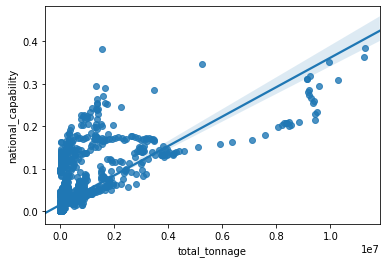

In [30]:
# Total Tonnage vs National Capability
sb.regplot(x="total_tonnage",y="national_capability",data=df_save)

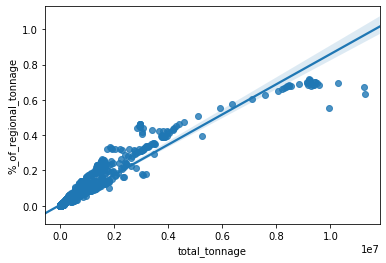

In [31]:
# Total Tonnage vs  % Regional Tonnage
sb.regplot(x="total_tonnage",y="%_of_regional_tonnage",data=df_save)

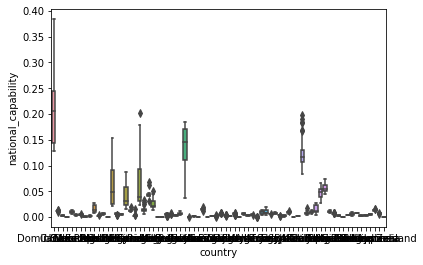

In [32]:
# Country vs  National Capability

sb.boxplot(x="country",y="national_capability",data=df_save)
plt.savefig('country vs. nat cap.png')

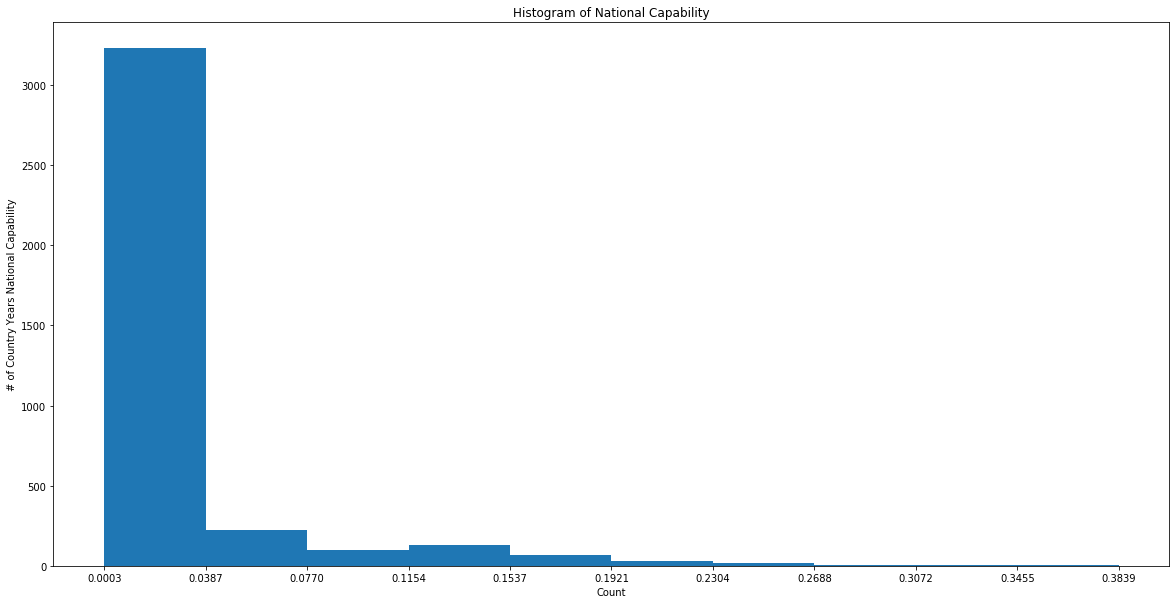

In [33]:
#Histogram
count, bin_edges = np.histogram(df_save['national_capability'])

df_save['national_capability'].plot(kind='hist', figsize=(20, 10), xticks=bin_edges)

plt.title('Histogram of National Capability') 
plt.ylabel('# of Country Years National Capability') 
plt.xlabel('Count') 

plt.show()

In [34]:
df_save.head(1)

,country,total_tonnage,%_of_regional_tonnage,bb,ssk,ssn,ssbn,cv,national_capability
year,,,,,,,,,
1906,USA,758326.0,0.141606,1.0,9.0,0.0,0.0,0.0,0.218284
